# Lab session 6: Association Analysis

## Introduction

The aim of this lab (Lab session 6) is for students to get experience with **Association Analysis** covered in week 8, by using typical Python libraries.


This session starts with a tutorial that uses examples to introduce you to  practical knowledge. We highly recommend that you read the following tutorials if you need a gentler introduction to the libraries that we use:
- [Mlxtend: Apriori](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
- [Numpy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html)
- [Numpy: basic broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Seaborn](https://seaborn.pydata.org/tutorial/relational.html)
- [Scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

## 1. Frequent itemsets

In order to present functionalities for association analysis in Python, we adapt an example from the ``mlxtend`` documentation.

Consider a dataset composed of five transactions. This dataset is represented by a list of five elements, each of which is a list of items bought during a trip to a supermarket.

In [40]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

The library ``mlxtend`` requires that each transaction is represented by a binary vector where each element indicates the presence or absence of a specific item.

The method ``TransactionEncoder.fit_transform`` can be used to convert the dataset created above into this expected format. This method returns a binary matrix (numpy array) where each transaction corresponds to a row and each column corresponds to an item.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te_ary)

The item corresponding to each column is stored by the ``TransactionEncoder`` object in a variable called ``columns_``. This variable can be used to create a ``DataFrame`` that conveniently represents the transaction dataset.

In [ ]:
import pandas as pd

df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)

The ``mlxtend`` function ``apriori`` receives a ``DataFrame`` that represents a transaction dataset and a parameter that specifies the support threshold. This function returns a ``DataFrame`` that contains one row for each frequent itemset. Each row contains a python ``frozenset`` that represents the itemset (by column indices) and a number that represents the support of this itemset.

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.6)
display(frequent_itemsets)

itemset = frequent_itemsets.loc[5]
print('Itemset: {0}. Support: {1}.'.format(itemset['itemsets'], itemset['support']))

Conveniently, if the parameter ``use_colnames`` is set to ``True``,  the ``mlxtend`` function ``apriori`` may instead return a ``DataFrame`` that represents itemsets by ``frozensets`` of item names.

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
display(frequent_itemsets)

Using typical ``pandas`` functionalities, it is easy to include a column in such a ``DataFrame`` to register the number of items in each frequent itemset, which can be used to filter itemsets by length.

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # length of each frozenset
print('Frequent 3-itemsets:')
display(frequent_itemsets[frequent_itemsets['length'] == 3])

It is also easy to create a ``dict`` that maps any frequent itemset (represented by a ``frozenset``) to its support.

In [ ]:
support = {}
for _, row in frequent_itemsets.iterrows():
    support[row['itemsets']] = row['support']

itemset = frozenset(['Onion', 'Eggs'])
print('Itemset: {0}. Support: {1}.'.format(itemset, support[itemset]))

## 2. Association rules

The ``mlxtend`` function ``association_rules`` receives a ``DataFrame`` that represents the set of frequent itemsets and returns a ``DataFrame`` that represents strong association rules for a specified confidence threshold. Each row in the resulting  ``DataFrame`` contains an association rule together with some potentially useful measures (we have not covered lift, leverage, or conviction). 

In [ ]:
from mlxtend.frequent_patterns import association_rules

strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
display(strong_rules)

## Exercise



The sample dataset to be used is one of Kaggle’s e-commerce resources containing historical sales transactions of electronic items. The dataset can be found in QM+.

The tasks to be completed for this exercise are:

1) Import the dataset </br>
2) Keep only the columns: 'Order ID', 'Product' </br>
3) Reset the index of the dataframe </br>
4) Use the following command for structuring the dataframe into a form/format for analysis: </br> pivot_table(index = 'Order ID', columns = 'Product', aggfunc = 'count') </br>
5) Check the resulting dataframe and perform a necessary pre-processing technique </br>
6) Convert the columns to boolean </br>
7) Identify the support frequency of items </br>
The support frequency is the number of times any individual item is sold (here we only count each item once per order) divided by the total number of transactions (or orders in this example). Which are the top-5 most frequent selling items? Can this insight help a retailer also boost the sales of less frequent selling items by pairing them with these high frequency lower cost electronic goods? Which products would make sense to pair together given this insight? </br>
8) Run the apriori algorithm from mlxtend </br>
9) Compute items that sell at minimum in a percentage of all orders placed in the month (e.g. try min_support=0.00000001) </br>
10) Compute pairs of orders that have a meaningful measure (e.g lift of more than 1; confidence of more than 0.1) in their sales when marketed together





Total item sales (ignoring quanitities)
18383
Total orders
17538
Total unique products
20


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((index, Google Phone))","((index, USB-C Charging Cable))",0.033128,0.118315,0.005987,0.180723,1.527479,0.002067,1.076175
1,"((index, iPhone))","((index, Lightning Charging Cable))",0.039514,0.125157,0.005987,0.151515,1.210603,0.001042,1.031065
2,"((index, Vareebadd Phone))","((index, USB-C Charging Cable))",0.012544,0.118315,0.002167,0.172727,1.459899,0.000683,1.065774


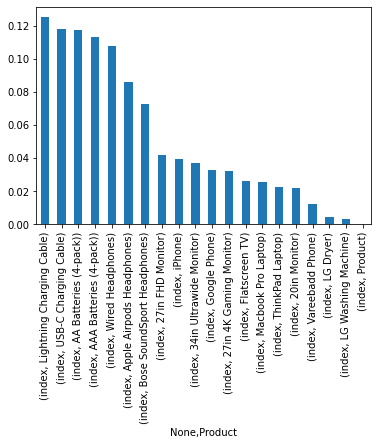

In [56]:
import numpy as np

# import dataset
sales_april = pd.read_csv('Sales_April_2019.csv')

print('Total item sales (ignoring quanitities)')
print(len(sales_april))
print('Total orders')
print(len(sales_april['Order ID'].value_counts()))
print('Total unique products')
print(len(sales_april['Product'].value_counts()))


#Restructure the dataset to keep one column per product
sales_filter = sales_april[['Order ID', 'Product']] #Ignore date and purchase address for now
sales_filter = sales_filter.reset_index()

df_orders = sales_filter.pivot_table(index = 'Order ID', columns = 'Product', aggfunc = 'count')
#Fill null values in the dataframe
df_orders = df_orders.fillna(0)

#Convert df orders columns to boolean
col_names = df_orders.columns
df_orders = df_orders[col_names].astype('bool')

df_orders.mean().sort_values(ascending=False).plot(kind='bar')

#Run the apriori algorithm from mlxtend 
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

#Compute items that sell at minimum in 0.001% of all orders placed in the month (min_support)
frequent_itemsets = apriori(df_orders, min_support = 0.00000001,max_len = 2, use_colnames = True)

#Compute pairs of orders that have a meaningful e.g. lift/confidence of more than 1/0.1 in their sales when marketed together
frequent_itemsets_rules = association_rules(frequent_itemsets,metric = "confidence", min_threshold = 0.1)
display(frequent_itemsets_rules)
